In [7]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

import pandas as pd
from datetime import datetime, timedelta

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import mysql.connector
import numpy as np

from scipy.signal import savgol_filter   # smooth the data

#plt.style.use('seaborn-white')
plt.style.use('seaborn-white')

In [8]:
pdr = pd.read_csv( "https://raw.githubusercontent.com/ClarksonAirlab/2019_sensor_workshop/master/Python/Tutorial/Tutorial%20Data/pdr_20190802.csv")

In [9]:
pdr.head()
pdr.columns = ["pm2.5","Temp","RH","AP","Flag","Time","Date"]

In [11]:

HW1 = pd.read_csv("/Users/gurajas/Downloads/2019_sensor_workshop-master/Python/Tutorial/TutorialData/argon9.csv")
#HW2 = pd.read_csv("https://raw.githubusercontent.com/ClarksonAirlab/2019_sensor_workshop/master/Python/Tutorial/Tutorial%20Data/argon44.csv")
pdr["Date"] = pd.to_datetime(pdr["Date"])
pdr["Time"] = pd.to_timedelta(pdr["Time"])
pdr["DateTime"] = pdr["Date"] + pdr["Time"]
pdr["DateTime"] = pd.to_datetime(pdr["DateTime"])
pdr.index=pdr['DateTime']


cols = pdr.columns[pdr.dtypes.eq('object')]
pdr[cols] = pdr[cols].apply(pd.to_numeric,errors = 'coerce')
pdr.info()

HW1.columns = ["DateTime","id","pm2.5hw1","pm10","Temp","RH"]
#HW2.columns = ["DateTime","id","pm2.5hw2","pm10","Temp","RH"]
HW1["DateTime"] = pd.to_datetime(HW1["DateTime"])
#HW2["DateTime"] = pd.to_datetime(HW2["DateTime"])

HW1.index=HW1['DateTime']
#HW2.index=HW2['DateTime']

HW1=HW1.sort_values('id')
#HW2=HW2.sort_values('id')



pdr=pdr['2019-08-02 16:22:01':'2019-08-02 21:21:00']
HW1=HW1['2019-08-02 16:22:01':'2019-08-02 21:21:00']
#HW2=HW2['2019-08-05 13:26:00':'2019-08-06 07:50:00']

pdr.index=pdr['DateTime']



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26147 entries, 2019-08-02 14:11:59 to 2019-08-02 21:27:45
Data columns (total 8 columns):
pm2.5       26147 non-null float64
Temp        26147 non-null float64
RH          26147 non-null int64
AP          26147 non-null int64
Flag        26147 non-null int64
Time        26147 non-null timedelta64[ns]
Date        26147 non-null datetime64[ns]
DateTime    26147 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(3), timedelta64[ns](1)
memory usage: 1.8 MB


/Users/gurajas/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


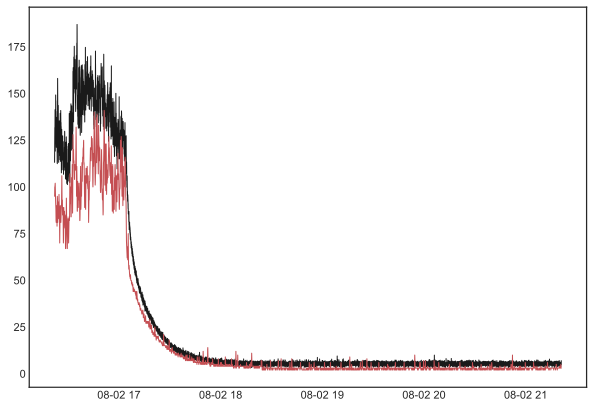

In [12]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax1.grid(False)


ax1.plot(pdr['DateTime'],pdr['pm2.5'], color='k',linewidth=1,label='grimm Raw data')

ax1.plot(HW1['DateTime'],HW1['pm2.5hw1'], color='r',linewidth=1,label='grimm Raw data')
#ax1.plot(HW2['DateTime'],HW2['pm2.5hw2'], color='g',linewidth=1,label='grimm Raw data')


In [13]:

pdrn=pdr.resample('5s').mean()


In [14]:
pdrn=pdrn.reset_index()


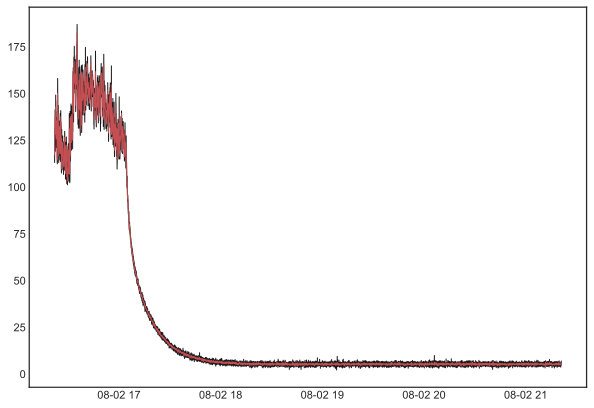

In [15]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax1.grid(False)


ax1.plot(pdr['DateTime'],pdr['pm2.5'], color='k',linewidth=1,label='grimm Raw data')
ax1.plot(pdrn['DateTime'],pdrn['pm2.5'], color='r',linewidth=1,label='grimm Raw data')




In [16]:
HW1=HW1.drop(['DateTime'], axis=1)


In [17]:
HW1=HW1.reset_index()


In [19]:
#HW2=HW2.drop(['DateTime'], axis=1)
#HW2=HW2.reset_index()


In [20]:


df = pd.merge_asof(pdrn,HW1[['DateTime','pm2.5hw1']], on='DateTime', tolerance=pd.Timedelta("5 minutes"), direction='nearest').fillna('NaN')
#df = pd.merge_asof(df,HW2[['DateTime','pm2.5hw2']], on='DateTime', tolerance=pd.Timedelta("5 minutes"), direction='nearest').fillna('NaN')


Text(0.5, 0, 'Honeywell pm2.5')

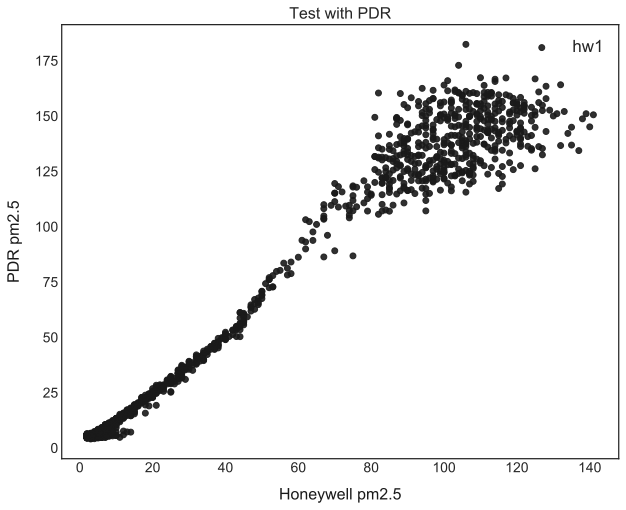

In [21]:
plt.figure(figsize=(10,8))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.scatter(df['pm2.5hw1'],df['pm2.5'], color= 'k',alpha=0.9,label='hw1')
#plt.scatter(df['pm2.5hw2'],df['pm2.5'], color= 'r',alpha=0.9,label='hw2')


plt.legend( loc='best',fontsize=17)

plt.title("Test with PDR", fontsize=16)
plt.ylabel('PDR pm2.5',fontsize=16,color='k',labelpad=13)
plt.xlabel('Honeywell pm2.5',fontsize=16,color='k',labelpad=13)

#plt.show()
#plt.savefig('books_read.png',dpi=300)

In [22]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
df['pdr']=df['pm2.5']
df['hw1']=df['pm2.5hw1']

In [24]:
results = smf.ols('pdr ~ hw1', data=df).fit()

In [25]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    pdr   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 1.811e+05
Date:                Thu, 08 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:20:45   Log-Likelihood:                -11807.
No. Observations:                3589   AIC:                         2.362e+04
Df Residuals:                    3587   BIC:                         2.363e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2732      0.125     10.214      0.0

In [26]:
df['chw1']=df['hw1']*1.3182+1.2732

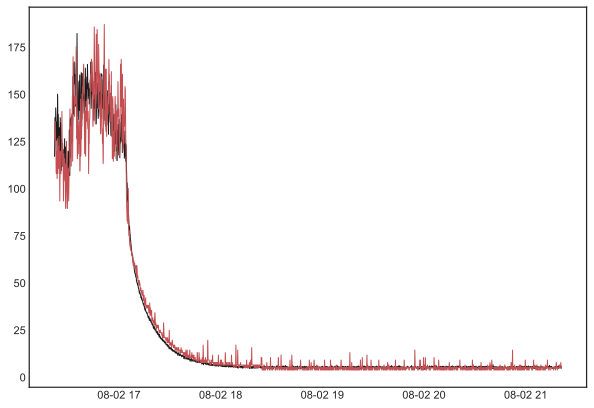

In [27]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)
ax1.grid(False)


ax1.plot(df['DateTime'],df['pdr'], color='k',linewidth=1,label='PDR')

ax1.plot(df['DateTime'],df['chw1'], color='r',linewidth=1,label='chw1')


Text(0.5, 0, 'Honeywell pm2.5')

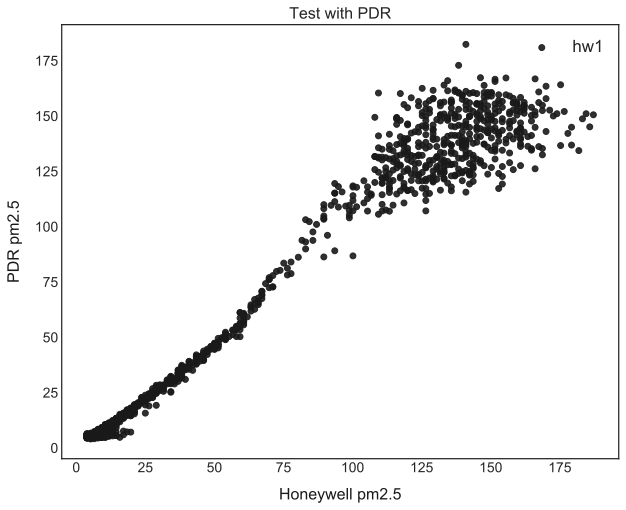

In [28]:
plt.figure(figsize=(10,8))

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


plt.scatter(df['chw1'],df['pdr'], color= 'k',alpha=0.9,label='hw1')


plt.legend( loc='best',fontsize=17)

plt.title("Test with PDR", fontsize=16)
plt.ylabel('PDR pm2.5',fontsize=16,color='k',labelpad=13)
plt.xlabel('Honeywell pm2.5',fontsize=16,color='k',labelpad=13)

#plt.show()
#plt.savefig('books_read.png',dpi=300)

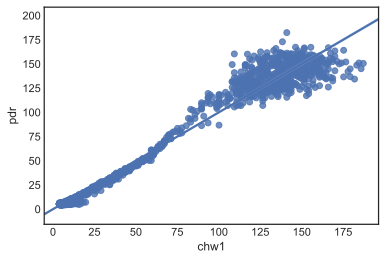

In [29]:
import seaborn as sns
ax = sns.regplot(x="chw1", y="pdr", data=df)